#Домашнее задание

1. Возьмите 2-3 других набора признаков и обучите модель линейной регрессии на них.
2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.
3. Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.
4. Выберите оптимальный набор признаков.


###Инициализация и загрузка данных

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

###Выбираем наборы признаков

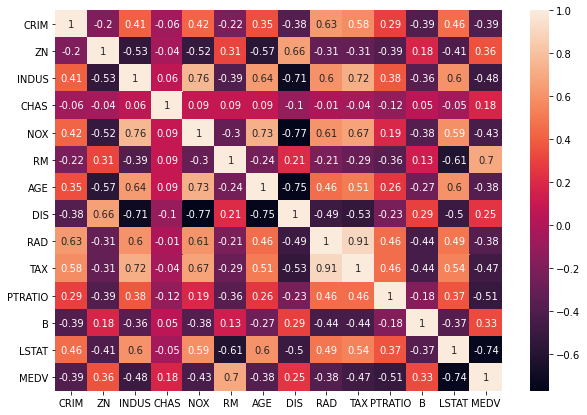

In [ ]:
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
features = [['LSTAT','RM'], ['LSTAT','RM', 'PTRATIO'], ['LSTAT','RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'], ['DIS', 'RAD']]

##Оцениваем результат

In [ ]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics)

                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   3.737640  3.704153  25.989649  21.950384  0.697449  0.719641
1       [LSTAT, RM, PTRATIO]   3.375341  3.165985  22.782518  15.738021  0.734784  0.798988
2  [LSTAT, RM, PTRATIO, TAX]   3.408744  3.359143  24.985324  18.729697  0.709141  0.760777
3                 [DIS, AGE]   6.382372  5.948582  78.129578  73.212529  0.090477  0.064901
4                 [DIS, RAD]   6.236853  5.921109  74.797832  66.152299  0.129262  0.155077
